# Time Series Forecasting

**scope**: 
- 시간에 대한 함수
- Data Wrangling for time-series in Python
- self projecting(o), cause and effect(X)
- uni-variate(o), multi-variate(x)
- Time-series Basics; seasonality, trend, residual
- Time-series forecasting using ARIMA (Box Jenkins Approach, ACF, PACF)

**requirements**:
- python 2.7 or 3
- statsmodel 0.8.0 (https://anaconda.org/search?q=statsmodels%20)
- 

**reference**:   
[1] [Seasonal ARIMA with Python](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/)  
[2] [A Complete Tutorial on Time Series Modeling in R](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)  
[3] [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)  
[4] [데이터 사이언스 스쿨/ 시계열 분석](https://www.datascienceschool.net/view-notebook/e0c935b3f55c4302b0fb0c93986562cd/)  
[5] [시계열 데이터의 통계적 분석 방법](https://www.google.co.kr/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjJkr3qqvDQAhVIyLwKHUgSDKoQFgggMAA&url=https%3A%2F%2Fbigdata.kookmin.ac.kr%2F%3Fmodule%3Dfile%26act%3DprocFileDownload%26file_srl%3D351%26sid%3D43ea21693d9f550e5e39869d5ce52adc&usg=AFQjCNFeXfnfSgzHQHDP85VZTBUvi4wy0Q&sig2=uZvEKrxxd_rr4Gv4lOB7Yw)




## 1. 시계열 데이터 이해

시계열 데이터 분석을 위해서는 기본적으로 시계열 데이터의 요소 및 정상/비정상 과정에 대한 이해가 필요하다.

![](figure/TS_pattern.png)
*(출처: [5])*

### 1.1. 시계열 데이터 요소 

- **추세(Trend)**: 장기적으로 나타나는 변동 패턴
- **계절성(Seasonal)**: 주,월,분기,반기 단위 등 이미 알려진 시간의 주기로 나타나는 패턴 
- **주기(Cyclic)**: 최소 2 년 단위로 나타나는 고정된 기간이 아닌 장기적인 변동
- **랜덤요소 (random/residual/remainder)**

![](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-decompose.png)


### 1.2. 정상 및 비정상 과정 모형 Staionary & Non-Stationary 


일반적으로 시계열 분석의 용이성을 위해 아래와 같이 비정상과정 모형(𝑌 )에 따르는 시계열 데이터 "
또한 추정 가능한 결정론적 추세함수 ($𝑓_{t}$ , trend) 와 확률 정상과정($ 𝑋_{t} $)의 합으로 가정하고 분석한다.

$$\begin{align*} & y_{t}\sim f_{\left( t\right) }+X_{t}\end{align*} $$

따라서 시계열 데이터 분석에서 정상과정 모형의 특성 및 분석방법들을 이해하는 것이 우선적으로 요구된다. 다음은 정상 시계열 모형과 비정상 시계열 모형의 특징 비교이다.

[상세설명 참고](https://www.datascienceschool.net/view-notebook/0ddd47967585403ab8b4cb60d0e420f6/)

** i.시간 추이에 따른 평균값의 불변여부**  
정상과정 - 평균은 시간에 따라 변화하는 함수가 아니다.;일정한 평균 else 비정상과정

$$ E(y_{t}) = \mu $$

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

** ii.시간추이에 따른 분산의 불변여부**  
정상과정 - 분산은 시간에 따라 변화하는 함수가 아니다.;일정한 분산  else 비정상과정

$$ var(y_{t}) = \sigma^{2} $$


![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

**C.시점간의 공분산**  
공분산은 t가 아닌 s에 의존함
$$ cov(y_{t}, y_{t+s}) = cov(y_{t}, y_{t-s}) = \gamma_{s} $$
$$ cov(X,Y) = E((X-\mu)(Y-\upsilon))  $$

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)


본 장에서 소개하는 통계적 시계열 추정 모형들은 시계열 데이터를 정상화시킨 모형 위에서 설계되어 있으므로, 필수적으로 데이터를 정상화 시키는 과정이 필요하다.  



## 2. 시계열 데이터 분석 Framework

일반적으로 아래와 같은 방법으로 시계열 데이터 분석을 진행한다.  
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/flowchart.png)

또는 [링크: 확률 과정 모형을 추정하는 방법](https://www.datascienceschool.net/view-notebook/e4b52228ac5749418d51409fdc4f9cef/)와 같은 절차를 통해 확률모형을 추정할 수 있다.

### 2.1 EDA; 시계열 데이터 확인하기

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

* __Wrangling__: 
dropna, column name, DF slicing, date_range, type conversion

In [2]:
df = pd.read_csv('data/portland-oregon-average-monthly.csv', index_col='Month')
# df.index.name=None
# df.reset_index(inplace=True)
df.dropna(axis=0, inplace=True)
df.columns = ['ridership']
print (df.head(),'\n ... \n', df.tail() )

df = df.ix[:-1]
print (df.tail())

        ridership
Month            
1960-01       648
1960-02       646
1960-03       639
1960-04       654
1960-05       630 
 ... 
                                                    ridership
Month                                                       
1969-03                                                 1419
1969-04                                                 1432
1969-05                                                 1394
1969-06                                                 1327
Portland Oregon average monthly bus ridership (...     n=114
        ridership
Month            
1969-02      1425
1969-03      1419
1969-04      1432
1969-05      1394
1969-06      1327


In [3]:
############ DF datetime으로 slicing 하기 ##########
#################################################

#######  DF describe() #######
##############################


In [4]:
#ERROR --> index type should be 'datetime'
# df.plot() 

# ERROR --> datetime requires 'YY-MM-DD-...'  format
# df['ridership'] = pd.to_datetime(df['ridership']) 

* change df.index as datetime object:

In [5]:
# for datetime conversion
pd.date_range("1960-01","1969-06",freq="MS")

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-09-01', '1968-10-01', '1968-11-01', '1968-12-01',
               '1969-01-01', '1969-02-01', '1969-03-01', '1969-04-01',
               '1969-05-01', '1969-06-01'],
              dtype='datetime64[ns]', length=114, freq='MS')

In [6]:
df.index = pd.date_range("1960-01","1969-06",freq="MS")
print(df.head(),'\n ... \n',df.tail())

           ridership
1960-01-01       648
1960-02-01       646
1960-03-01       639
1960-04-01       654
1960-05-01       630 
 ... 
            ridership
1969-02-01      1425
1969-03-01      1419
1969-04-01      1432
1969-05-01      1394
1969-06-01      1327


In [7]:
type(df.index)

pandas.tseries.index.DatetimeIndex

* change type of dataframe's column

In [8]:
df['ridership'] = df['ridership'].astype(int)
print (df.dtypes)
# OR, alternatively, 
# df['ridership'] = df['ridership'].apply(lambda x: int(x))
# df.dtypes

ridership    int64
dtype: object


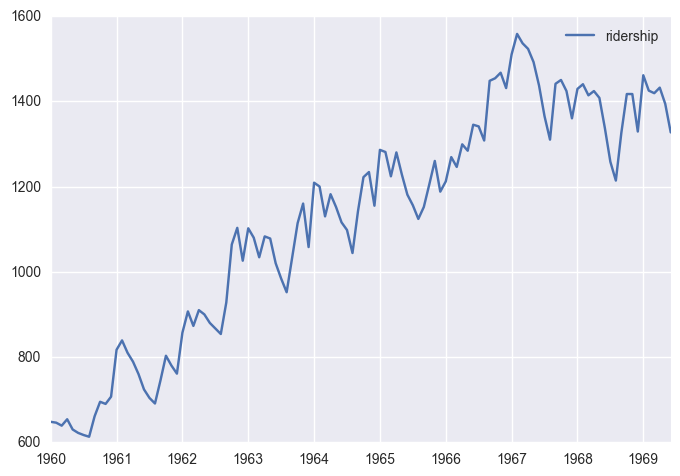

In [9]:
df.plot()
# df.plot(figsize=(12,8), title = 'Montly Ridership', fontsize=14)

#### Seasonal Decomposition (STL)

남은 residual value를 추출함으로써, time-independent한 time-series를 뽑음

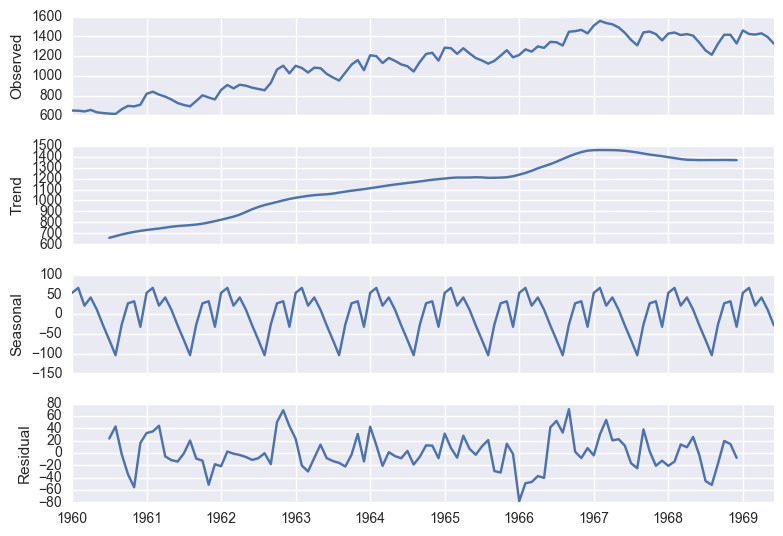

In [10]:
decomposition = seasonal_decompose(df['ridership'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

### 2.2 시계열 데이터 정상화 하기

### 정상성 확인 stationarity check
일반적으로 데이터가 stationary한 경우는 거의 없음. 
정상성을 Test하기 위해서 두가지 방법 사용   

**(1) 눈으로 직관적 확인 ~ STL, Rolling statistics(moving average)    
(2) Dickey-FUller test [링크](https://www.datascienceschool.net/view-notebook/ebb638fc880145b9adeef8dfa630f067/)  **

아래는  Dickey-Fuller test 와 더불어  trend를 추출하는 방법중 하나인 rolling statistics를 이용해서 동시에 정상성을 검사하는 방법이다

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


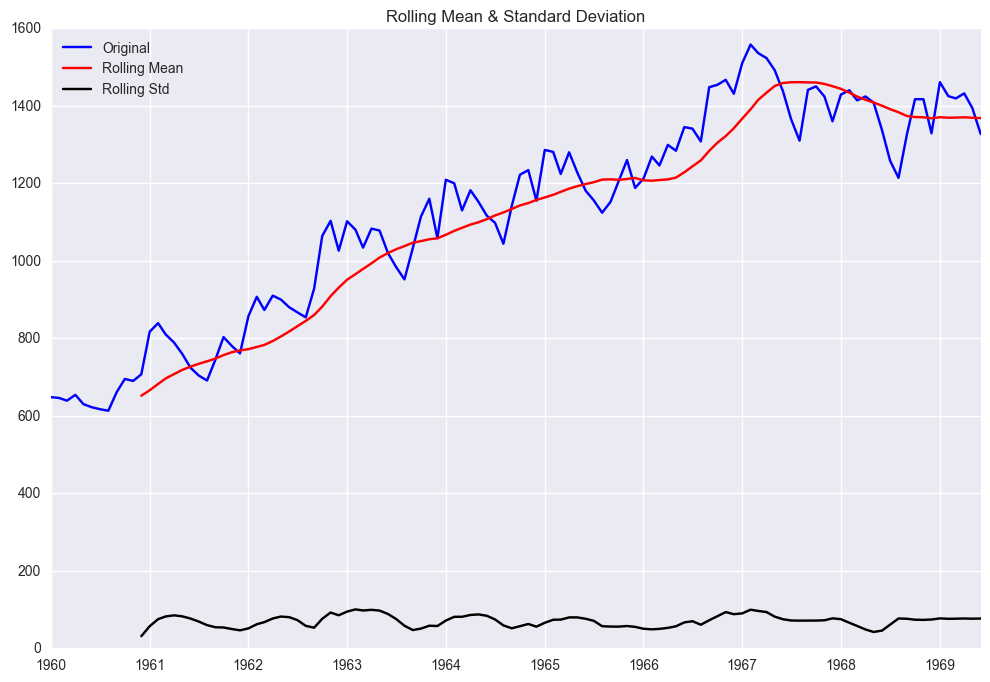

<Results of Dickey-Fuller Test>
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


In [12]:
test_stationarity(df['ridership'])

* Judgment:   
(null-hypothesis: TS is non-stationary)  
p-value < 0.05: reject null-hypothesis --> Stationary  
p-value > 0.05: accept --> non-Stationary  

### 정상화 Stationarize

비정상 확률과정을 정상 확률 과정으로 변환하는 방법은 여러가지 [[1]](http://people.duke.edu/~rnau/whatuse.htm), [[2]](https://www.datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/)가 있으며, 주어진 데이터에 따라 가장 효율적인 방법이 다르거나 혼합하여 사용한다. (상세내용 링크참조)
여기서는 짧게 세가지에 대해서 소개한다. 
- **차분(differencing)**: 1차차분. Trend 제거하는데 용이 $\Delta y_{t} = y_{t} - y_{t-1}$
- **로그변환(lograithm)**: 표준편차가 자료의 크기에 비례하여 증가할때
- **Box-Cox 변환**: 정규분포가 아닌 자료를 정규분포로 변환. 


여기서는 차분을 이용하여 정상화를 한다.



/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


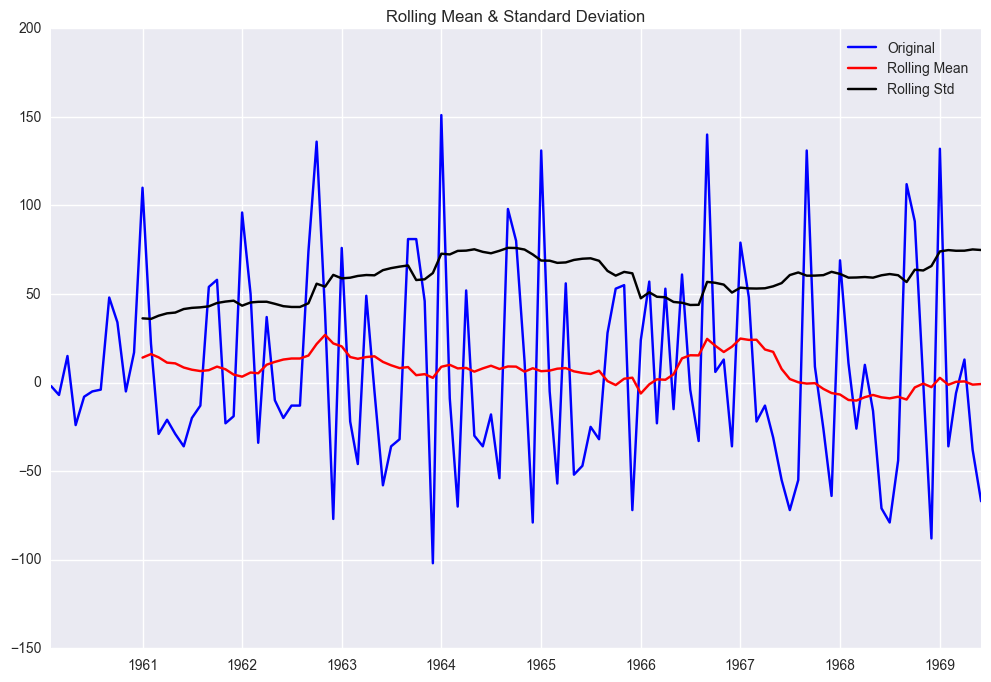

<Results of Dickey-Fuller Test>
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


In [13]:
df['first_difference'] = df['ridership'] - df['ridership'].shift(1)  
# Or Alternatively, 
# df.diff().plot()
test_stationarity(df.first_difference.dropna(inplace=False))

좀더 나은 수준의 정상화를 위해, 도한 seasonal 패턴을 좀더 명확히 보고 싶고, long-term에서도 잘 남아있게 하기 위해서 seasonaly differencing 을 적용한다.

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


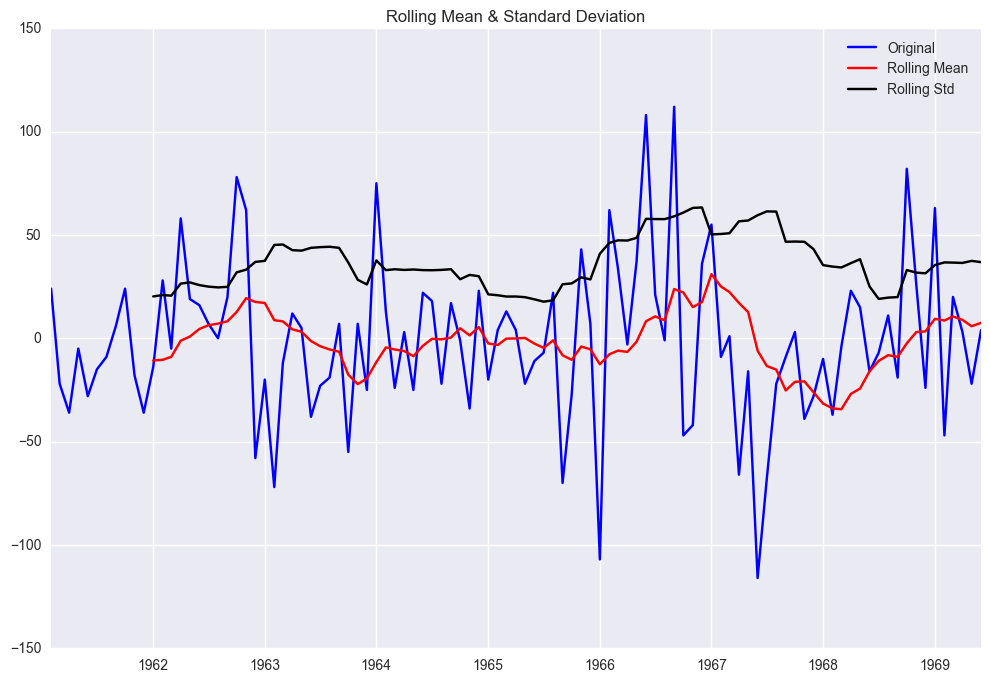

<Results of Dickey-Fuller Test>
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (5%)           -2.890906e+00
Critical Value (1%)           -3.497501e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [14]:
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

p-value가 더 높아진 점에서 seasonal first difference를 통해 최종적으로 data를 정상화 시켰다고 판단한다.추가적으로 로그변환(`df[~] = np.log(df[~])`)도 할 수 있으나, 본 경우에서는 분석후 크게 나아지지 않았다.
또한 추가로 추세를 추정하여 제거하는 기법[(링크: 결정론적 추세/다항식 추세/ 계절성 추세 추정)](https://www.datascienceschool.net/view-notebook/240b62a8927043c79b5384536e42f99d/)들이 있으나, 충분히 정상화 되었다고 판단하고 본 분석에서는 소개하지 않는다.

 ### 2.3 모수추정;  최적 파라미터(모형차수) 도출

### ARIMA 모델의 개념

- 출처: [데이터 사이언스 스쿨](https://www.datascienceschool.net/view-notebook/d5226389a8414583a45fb47e1e1cf6fb/)

** a. 정상과정 확률 모형(1/2) - General Linear Process Model **  
정상확률 과정에서 가장 일반적으로 사용되는 모형은 일반선형 확률 과정 모형(General Linear Process Model)이다. 해당 모형은 시계열이 [가우시안 백색잡음](https://www.datascienceschool.net/view-notebook/6b963e771dc54f8c8cb23437274a86d6/) ($e_{t}$)의 현재값과 과거값들의 선형조합으로 이루어져 있다고 가정. $\psi $ 는 가중계수(weight coefficient). 

$$ Y_t = e_t + \psi_1 e_{t-1}  + \psi_2 e_{t-2}  + \psi_1 e_{t-3}  + \cdots $$

위 모형의 블럭 다이어그램은 다음과 같다.

![](figure/glpm.png)

** b. 정상과정 확률 모형 (2/2) MA, AR, ARMA **

일반 선형 확률 과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형으로 분류된다.

- **MA (Moving Average) 모형**: 백색 잡음의 현재 값과 과거 값 중 유한(finite)개의 값에 대한 선형 가중합(linear weighted summation)으로 나타나는 확률 과정.q차수에 대해서 MA(q)로 표기  

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots - \theta_q e_{t-q} $$
![](figure/ma.png)

- **AR (Auto-Regressive) 모형**: 자기 자신의 과거값에 의존적인 모형. 백색 잡음의 현재값과 자기 자신의 과거값의 선형 가중합으로 이루어진 정상 확률 모형. p차수의 AR모형: AR(p)

$$ Y_t = \phi_1 Y_{t-1}  + \phi_2 Y_{t-2}  + \cdots + \phi_p Y_{t-p}  + e_t $$

![](figure/ar.png)

이 모형이 선형확률과정을 따르는 것은 아래와 같이 증명 할 수 있다.   


$$
\begin{eqnarray}
Y_t 
&=& \phi Y_{t-1} + e_t \\
&=& \phi \left( \phi Y_{t-2} + e_{t-1} \right) + e_t \\
&=& \phi^2 Y_{t-2} + \phi e_{t-1} + e_t \\
&=& \phi^2  \left( \phi Y_{t-3} + e_{t-2} \right)  + \phi e_{t-1} + e_t \\
&=& \phi^3 Y_{t-3} + \phi^2 e_{t-2}  + \phi e_{t-1} + e_t \\
&\vdots& \\
&=& e_t + \phi e_{t-1} + \phi^2 e_{t-2} + \phi^3 e_{t-3} + \cdots  \\
\end{eqnarray}
$$

- **ARMA (Auto-Regressive Moving Average) 모형**: ARMA(p,q) 모형은 AR(p) 모형과 MA(q) 모형의 특징을 모두 가지는 모형을 말함.  

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1} - \theta_2 e_{t-2} \cdots  - \theta_q e_{t-q} $$


** c. 비정상과정확률모형 -  ARIMA **

 비정상 과정 모형 중 가장 대표적인 모형으로,  ARMA 모형을 누적한 모형이다. 시계열  $Y_{t}$ 을 차분한 결과로 만들어진 시계열 $\nabla Y_t = Y_t - Y_{t-1}$  이 ARMA 모형을 따르면 원래의 시계열 $Y_{t}$ 를 ARIMA(Autoregressive Integrated Moving Average) 모형이라고 한다.

만약  $d$ 번 차분한 후에야 시계열  $\nabla Y_t$ 가 ARMA(p,q) 모형을 따른다면 적분 차수(order of integration)가  $d$ 인 ARIMA 모형으로 ARIMA(p, d, q)로 표기한다.  $q=0$ 인 경우에는 ARI(p,d), $p=0$ 인 경우에는 IMA(d,q)로 표기한다.


### ARIMA 모형 차수 결정  

앞서 설명한 ARIMA의 p, d, q 모형차수는 아래와 같은 방법으로 결정 할 수 있다. [(상세참조)](https://www.datascienceschool.net/view-notebook/b39ccd2da3e64d6e91981e23e01816c4/) 

- **Augmented Dickey-Fuller 검정** : d
- **자기상관계수 함수(ACF)**: q
- **편자기상관계수 함수(PACF)** : p

| 모형        | ACF  | PACF  |
| :-------: |:-------------:| :-------------:|
| AR(p)| 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽모두 나타남 (시차가 증가함에 따라0 으로 급속히 접근) |p 의 시차까지 유의성 있는 값을 나타내고 이후 소멸함|
| MA(q)| q 의 시차까지 유의성 있는 값을 나타내고 이후 소멸함 | 지수함수적으로 감소하거나 점차진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로급속히접근)|
| ARMA(p,q)| 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로 급속히 접근) | 지수함수적으로 감소하거나 점차 진폭이 축소되는 사인 곡선의 파동을 나타내거나 또는 양쪽 모두 나타남 (시차가 증가함에 따라 0 으로 급속히 접근) |
![](figure/parameter.png)
![ARIMA](figure/ARIMA.png)


본 분석에서는 연단위(12개월) 차이로 정상화 시켜서, Seasonal ARIMA 모델로 분류됨.  
> Seasonal ARIMA 모형은 줄여서 SARIMA라고 하기도 한다. 단순 SARIMA 모형은 각 계절에 따른 독립적인 ARIMA 모형이 합쳐져 있는 모형이다. 기존 ARIMA(p,d,q) 모형에 계절성 주기를 나타내는 차수 s가 추가적으로 필요하기 때문에 SARIMA(P,D,Q,s) 로 표기한다.  
s의 값은 월별 계절성을 나타낼 때는  $s=12$ 가 되고 분기별 계절성을 나타낼 때는  $s=4$ 가 된다

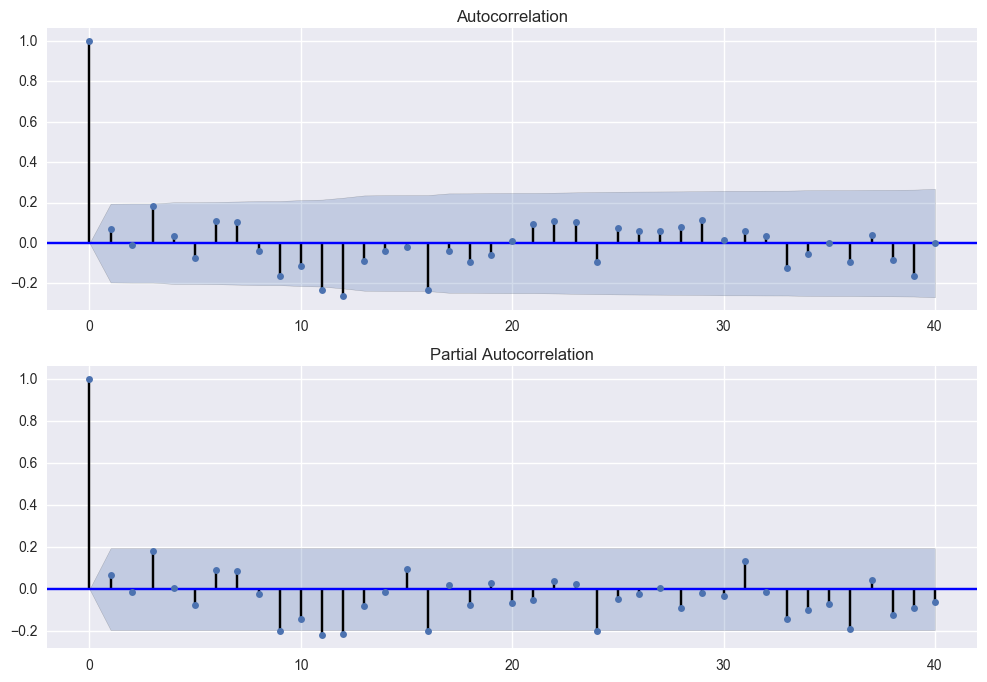

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:],lags=40,ax=ax2) 

위 그래프에서, 1차 차분한 값이 t+1..t+12까지 AR(0), MR(0), 12번째에서 +->- SAR(1), SMA(1)

최종적으로 **SARIMA (0,1,0)X(1,1,1,12) **  

SARIMA 모형추정 [예시](https://www.datascienceschool.net/view-notebook/602e62fc1c544ffcb43c2c7e1484dc14/)

### 2.4 모델 수립  
위 단계에서 확정한 모델의 모형차수를 이용하여, (Seasonal) ARIMA 모델을 생성한다

In [16]:
mod = sm.tsa.SARIMAX(df['ridership'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -501.340
Date:                            Thu, 15 Dec 2016   AIC                           1008.680
Time:                                    17:43:50   BIC                           1016.889
Sample:                                01-01-1960   HQIC                          1012.012
                                     - 06-01-1969                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.115      2.816      0.005       0.098       0.549
ma.S.L12      -0.9990      2.489   

LSTM을 이용한 시계열 추정 
anomaly detection 예제

### 2.5  시계열 예측

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/base/data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


,ridership,first_difference,seasonal_first_difference,forecast
1968-07-01,1258,-79.0,-7.0,1296.346206
1968-08-01,1214,-44.0,11.0,1258.596774
1968-09-01,1326,112.0,-19.0,1356.836145
1968-10-01,1417,91.0,82.0,1395.808702
1968-11-01,1417,0.0,26.0,1394.657184
1968-12-01,1329,-88.0,-24.0,1339.628128
1969-01-01,1461,132.0,63.0,1424.051451
1969-02-01,1425,-36.0,-47.0,1438.092678
1969-03-01,1419,-6.0,20.0,1407.277891
1969-04-01,1432,13.0,3.0,1427.492444


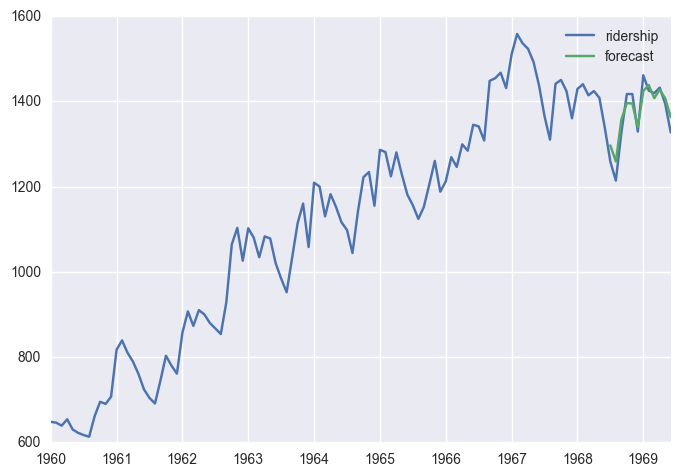

In [17]:
df['forecast'] = results.predict(start = len(df)-12, end= len(df), dynamic= True)  
df[['ridership', 'forecast']].plot()
df[-12:]

In [18]:
start = datetime.datetime.strptime("1982-07-01", "%Y-%m-%d") 
# >1982-07-01 00:00:00

date_list = [start + relativedelta(months=x) for x in range(0,12)]
#> 1982/7/1,8/1, ... 1983/6/1

In [19]:
future_df = pd.DataFrame(index=date_list, columns= df.columns)
new_df = pd.concat([df, future_df]) #concatenated  dataframe

# print(new_df.head(),'\n...\n',new_df.tail())

In [26]:
# mod = sm.tsa.SARIMAX(new_df['ridership'].iloc[:-24],order=(0,1,0), seasonal_order=(1,1,1,12))
# results = mod.fit()
# print (results.summary())

new_df['forecast'] = results.predict(start = len(df)-36, end = len(df), dynamic= True)  
new_df[-48:]

# new_df[['ridership', 'forecast']].ix[-24:].plot() 
# plt.savefig('ts_predict_future.png', bbox_inches='tight')

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/statsmodels/base/data.py:551: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(squeezed, index=self.predict_dates)


,ridership,first_difference,seasonal_first_difference,forecast
1966-07-01,1341.0,-4.0,21.0,1324.172168
1966-08-01,1308.0,-33.0,-1.0,1297.795708
1966-09-01,1448.0,140.0,112.0,1347.914921
1966-10-01,1454.0,6.0,-47.0,1412.272708
1966-11-01,1467.0,13.0,-42.0,1444.203348
1966-12-01,1431.0,-36.0,36.0,1386.141996
1967-01-01,1510.0,79.0,55.0,1457.941141
1967-02-01,1558.0,48.0,-9.0,1486.028269
1967-03-01,1536.0,-22.0,1.0,1454.617639
1967-04-01,1523.0,-13.0,-66.0,1494.888102
